---
title: "Using Convolutions"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-04-08"
categories: [python, datacamp, machine learning, deep learning, tensorflow, keras, neural network]
image: "convolutions.gif"

---

# Using Convolutions

Convolutions are the basic building blocks of convolutional neural networks. You will learn how convolutions operate on image data in this chapter. Additionally, you will learn how to incorporate convolutions into Keras neural networks.

This **Using Convolutions** is part of [Datacamp course: Image Processing with Keras in Python] Deep learning methods are used in image processing to train neural network algorithms to perform various machine learning tasks. Using convolutional neural networks (CNNs), you will be able to classify different types of objects for the analysis of images. In this four-hour course, you will be taught how to construct, train, and evaluate CNNs using Keras.

It is a challenging task to turn images into data and train neural networks to classify them using deep learning. It has extensive applications in business and research ranging from helping eCommerce sites manage inventory more efficiently to assisting cancer researchers to identify dangerous melanoma quickly.

In the first chapter of this course, you will learn how images can be viewed as data and how you can use Keras to train a neural network to classify objects within an image.

A fundamental component of CNNs is convolutions, which will be discussed in the second chapter. Through the use of test data, you will learn how Keras CNNs operate on image data and how to train and tweak your Keras CNN. In later chapters, you will learn how to create a deep learning network in greater detail.

In this course, you will learn how to track the performance of a CNN and how to improve it. By this point, you will be able to create Keras neural networks, optimize them, and visualize their responses across a variety of applications.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Image Processing with Keras in Python]: (https://app.datacamp.com/learn/courses/image-processing-with-keras-in-python)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

# Convolutions
* Using correlations in images
    * Natural images contain spatial correlations (pixels along a contour or edge)
    * How can we use these correlations?
* Convolutions

![](convolutions.gif)

## One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.

In [3]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


## Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [4]:
im = pd.read_csv('dataset/brick_bw.csv').to_numpy()

In [5]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


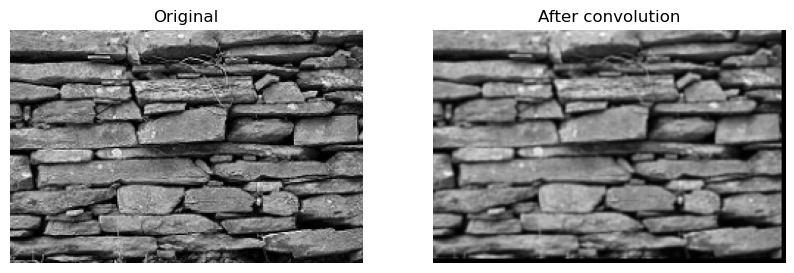

In [6]:
plot_comparison(im, result, 'After convolution')

## Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:

In [7]:
np.array([[-1, 1, -1],
          [-1, 1, -1],
          [-1, 1, -1]])

array([[-1,  1, -1],
       [-1,  1, -1],
       [-1,  1, -1]])

In [8]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

In [9]:
kernel = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]])

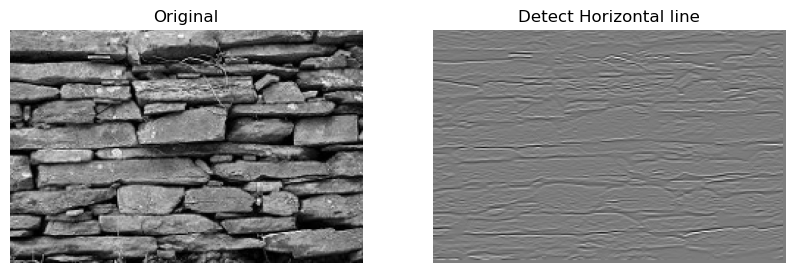

In [10]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detect Horizontal line')

In [11]:
kernel = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

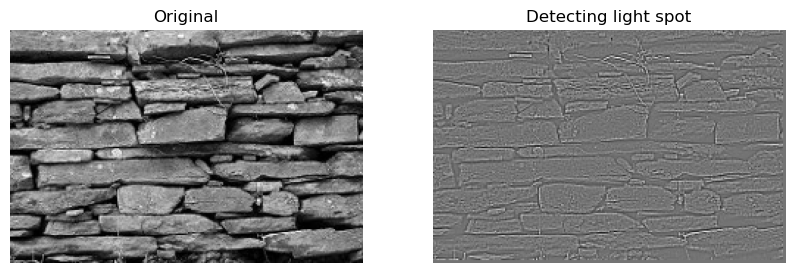

In [12]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting light spot')

In [13]:
kernel = np.array([[1, 1, 1],
                   [1, -1, 1],
                   [1, 1, 1]])

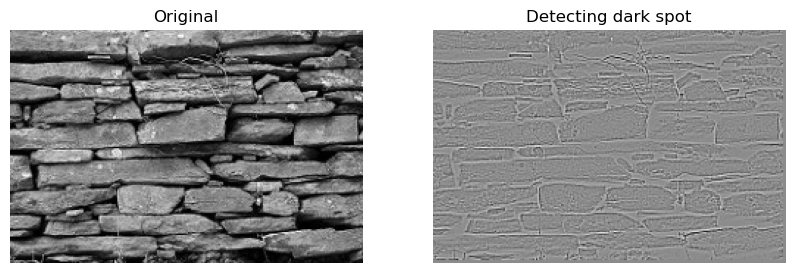

In [14]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting dark spot')

# Implementing image convolutions in Keras
## Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

img_rows, img_cols = 28, 28

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an outputlayer for the 3 categories
model.add(Dense(3, activation='softmax'))

Metal device set to: Apple M2 Pro


## Training a CNN to classify clothing types
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

In [16]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, validation_split=0.2,
          epochs=3, batch_size=10);

Epoch 1/3


2023-04-08 23:39:49.303080: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 1s 41ms/step - loss: 12.1992 - accuracy: 0.5750 - val_loss: 7.9527 - val_accuracy: 0.7000
Epoch 2/3
4/4 [==============================] - 0s 13ms/step - loss: 1.2022 - accuracy: 0.8500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 0s 11ms/step - loss: 1.6821 - accuracy: 0.9500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


## Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images

In [18]:
model.evaluate(test_data, test_labels, batch_size=10);

1/1 [==============================] - 0s 20ms/step - loss: 0.0000e+00 - accuracy: 1.0000


# Tweaking your convolutions

![](convolution-1.png)

Tweaking your convolutions
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [20]:
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [21]:
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu',
                 input_shape=(img_rows, img_cols, 1),
                 strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))